In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/timvalencony/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
!pip install fastparquet pyarrow

In [3]:
def _read_data(path):
    _target_column_name = 'log_bike_count'
    data = pd.read_parquet(path)
    # Sort by date first, so that time based cross-validation would produce correct results
    data = data.sort_values(["date", "counter_name"])
    y_array = data[_target_column_name].values
    X_df = data.drop([_target_column_name, "bike_count"], axis=1)
    return X_df, y_array

In [26]:
X_final = pd.read_parquet('../../data/final_test.parquet')

In [27]:
X_final

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
...,...,...,...,...,...,...,...,...,...,...
51435,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 11:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980
51436,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980
51437,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 17:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980
51438,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 18:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980


In [28]:
y_pred = pd.read_csv('submission.csv')

In [29]:
final_sub = X_final.copy()
final_sub['log_bike_count'] = y_pred['log_bike_count']
final_sub

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.379058
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.616464
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.960293
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.882010
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.138168
...,...,...,...,...,...,...,...,...,...,...,...
51435,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 11:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.611192
51436,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.013451
51437,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 17:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.216616
51438,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,2021-10-18 18:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.651478


In [30]:
final_sub["counter_name"].unique()

['28 boulevard Diderot E-O', '28 boulevard Diderot O-E', '39 quai François Mauriac NO-SE', '39 quai François Mauriac SE-NO', '18 quai de l'Hôtel de Ville NO-SE', ..., '90 Rue De Sèvres SO-NE', '20 Avenue de Clichy NO-SE', '20 Avenue de Clichy SE-NO', '254 rue de Vaugirard NE-SO', '254 rue de Vaugirard SO-NE']
Length: 56
Categories (56, object): ['152 boulevard du Montparnasse E-O', '152 boulevard du Montparnasse O-E', '18 quai de l'Hôtel de Ville NO-SE', '18 quai de l'Hôtel de Ville SE-NO', ..., 'Totem Cours la Reine E-O', 'Totem Cours la Reine O-E', 'Voie Georges Pompidou NE-SO', 'Voie Georges Pompidou SO-NE']

In [31]:
final_sub[final_sub["counter_name"]=='28 boulevard Diderot E-O']

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.379058
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.616464
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.960293
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.882010
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.138168
...,...,...,...,...,...,...,...,...,...,...,...
624,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-10-18 14:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.518295
625,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-10-18 16:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.173957
626,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-10-18 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.984195
627,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-10-18 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.184681


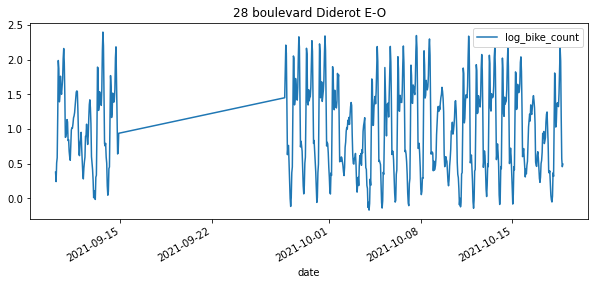

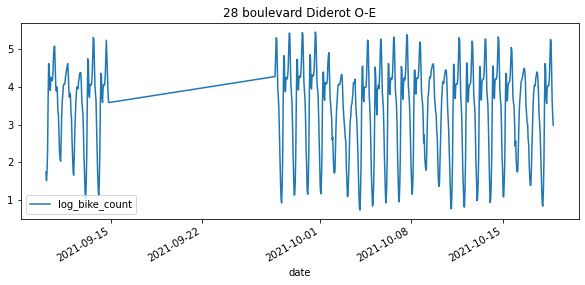

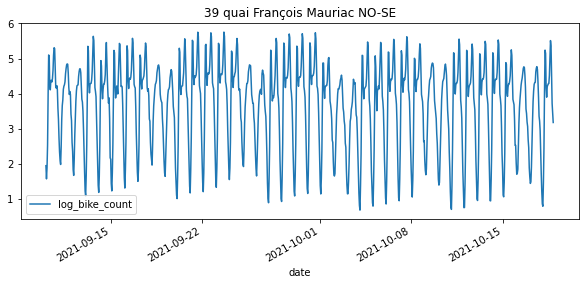

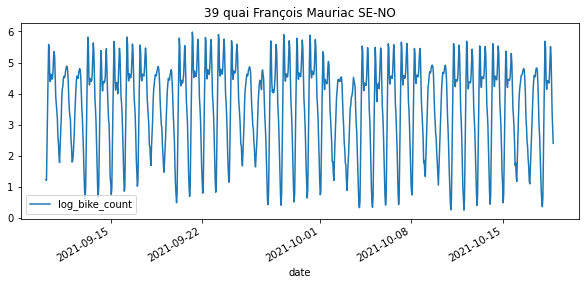

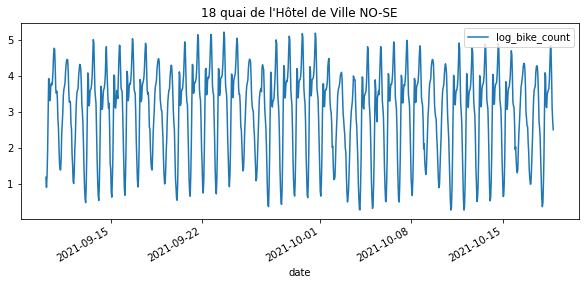

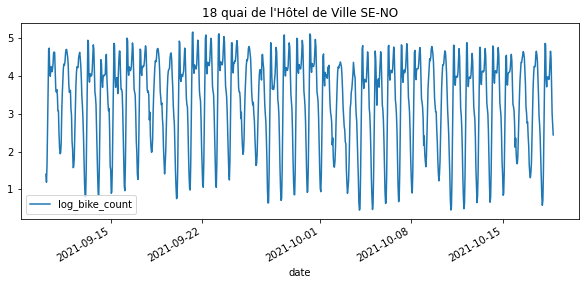

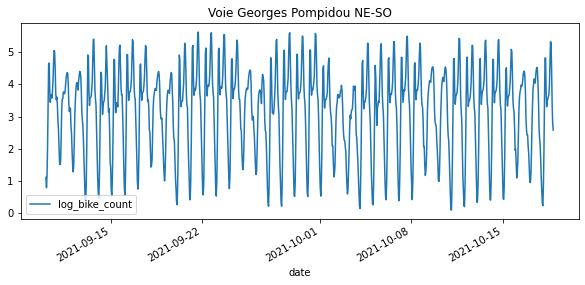

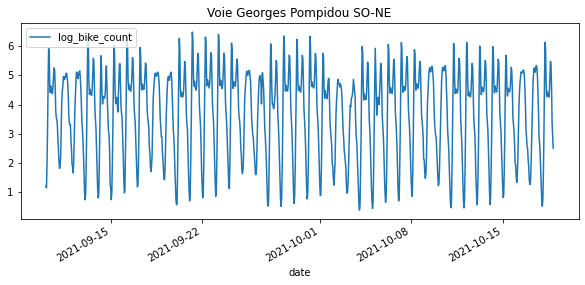

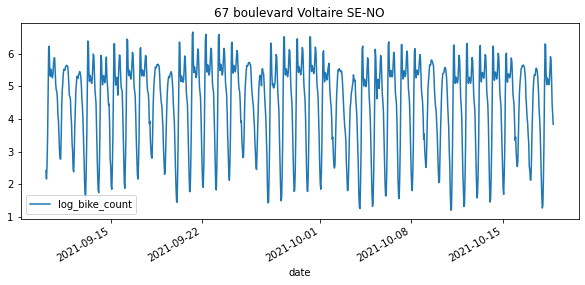

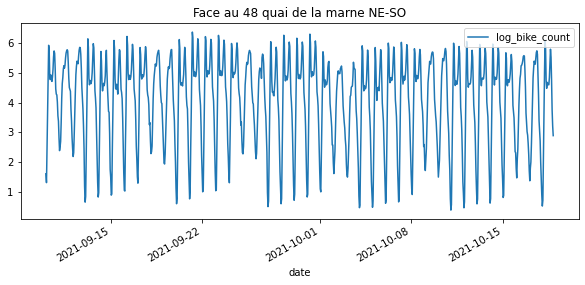

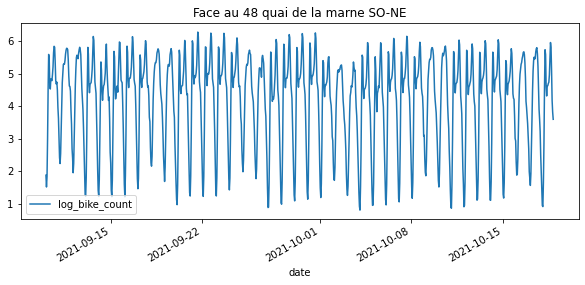

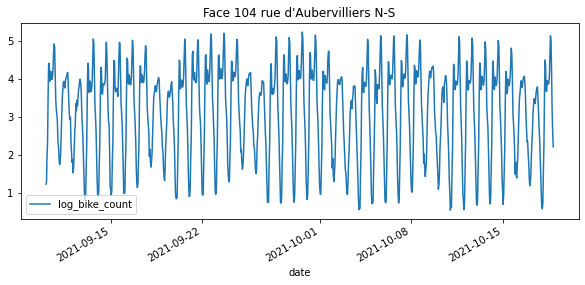

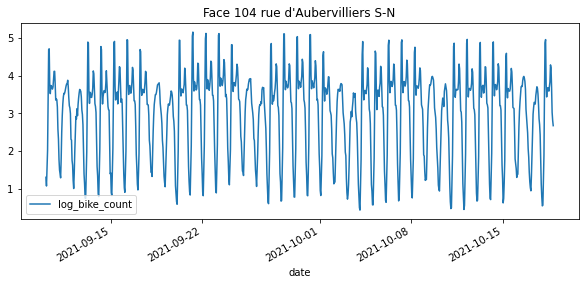

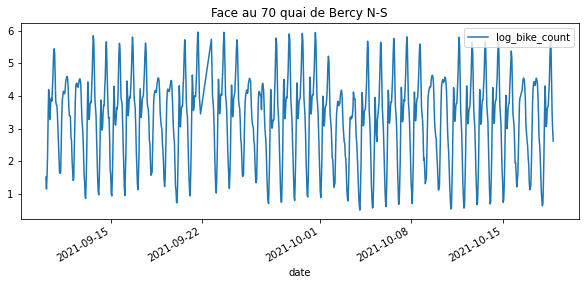

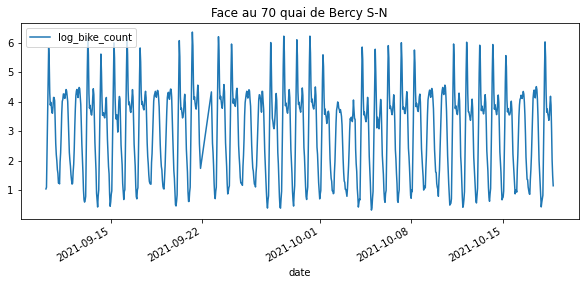

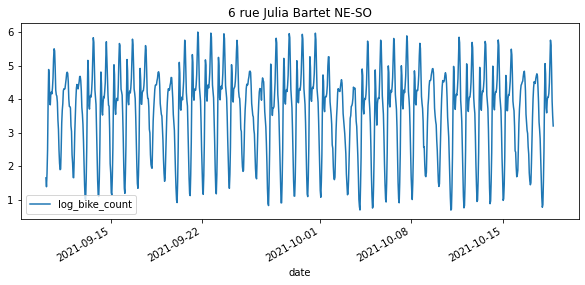

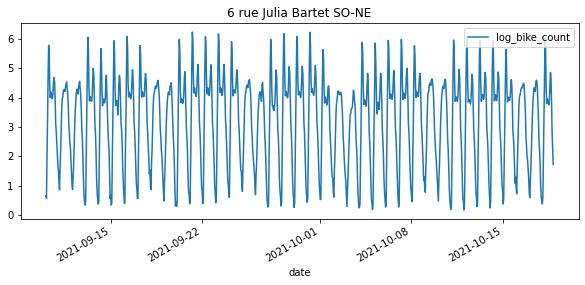

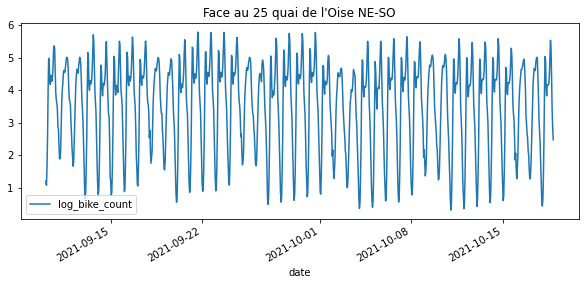

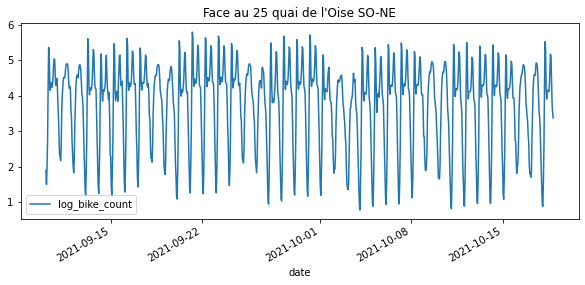

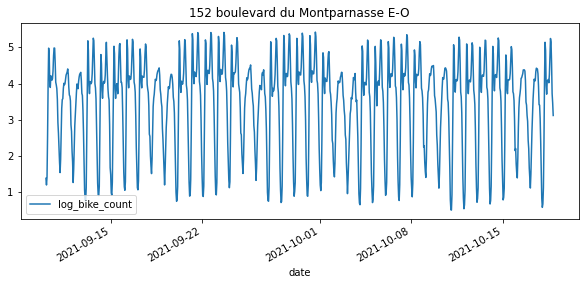

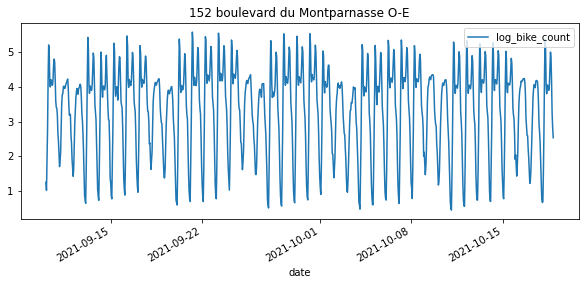

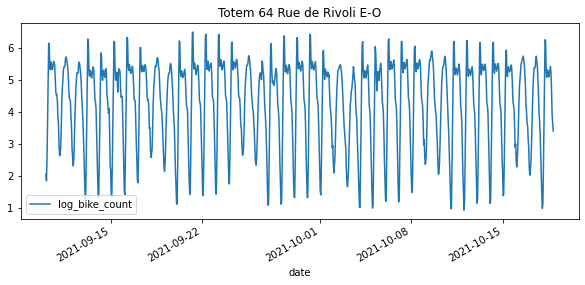

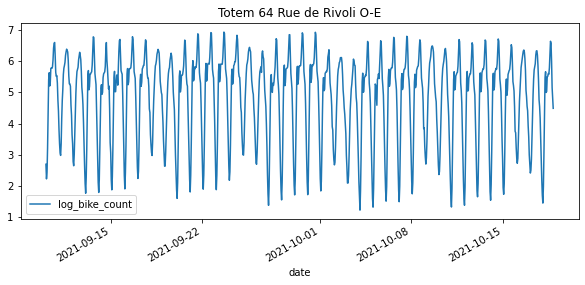

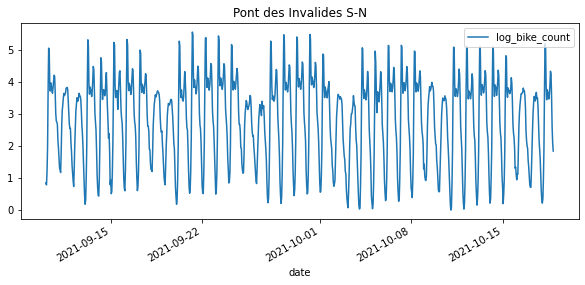

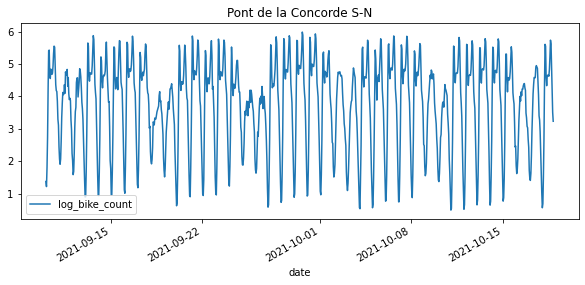

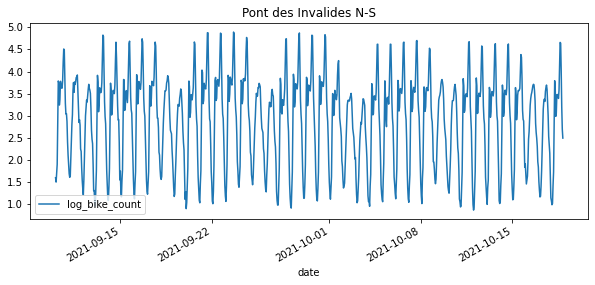

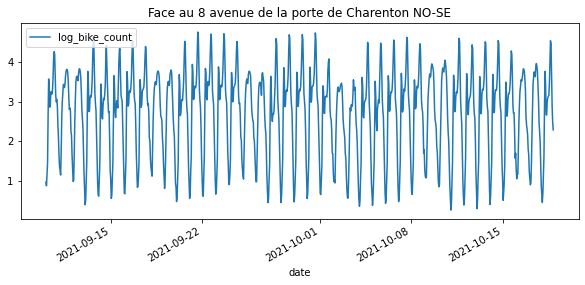

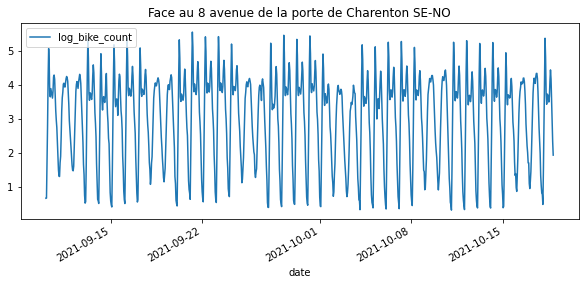

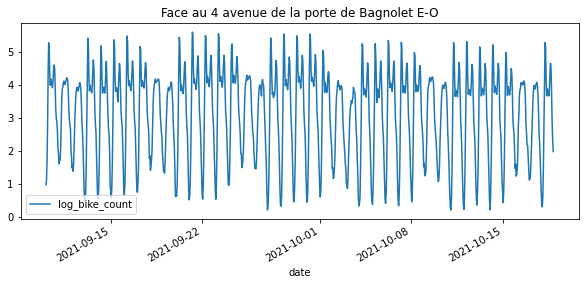

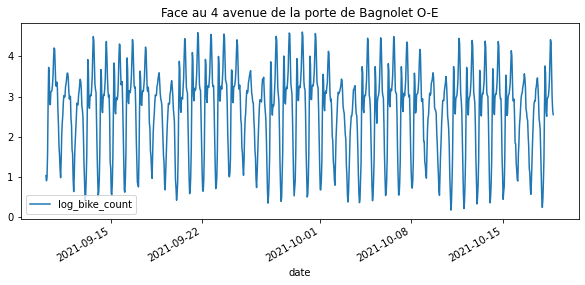

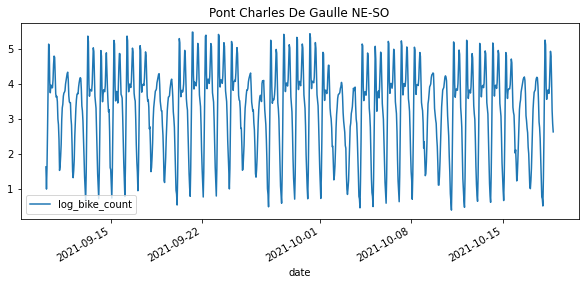

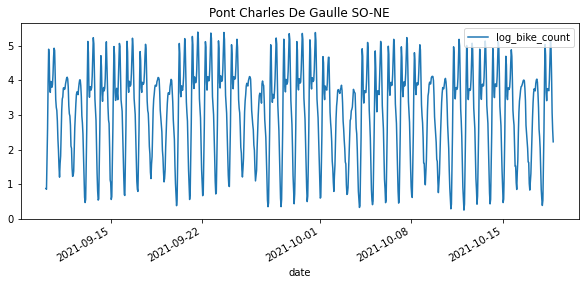

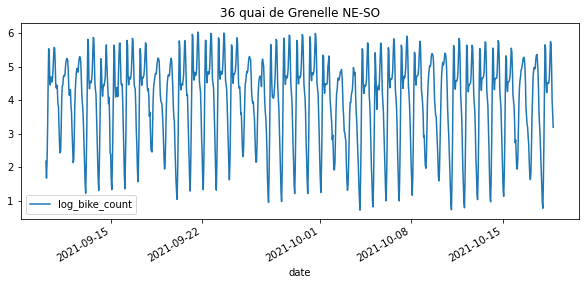

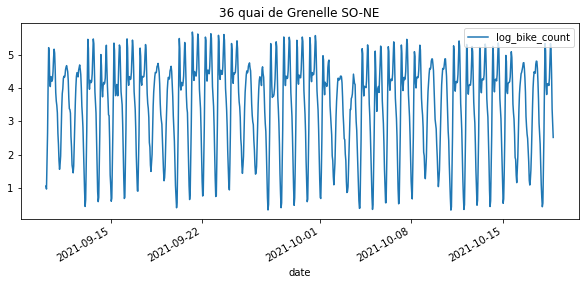

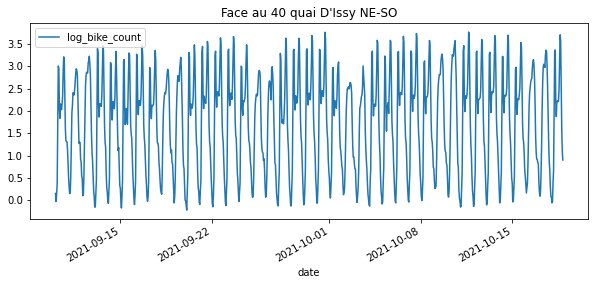

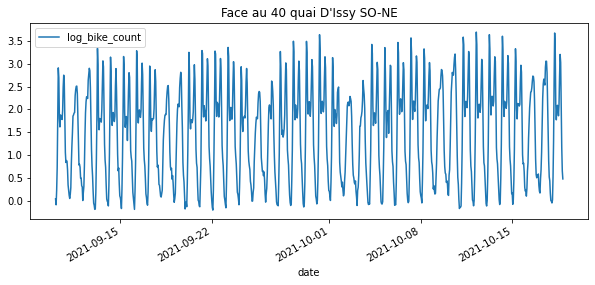

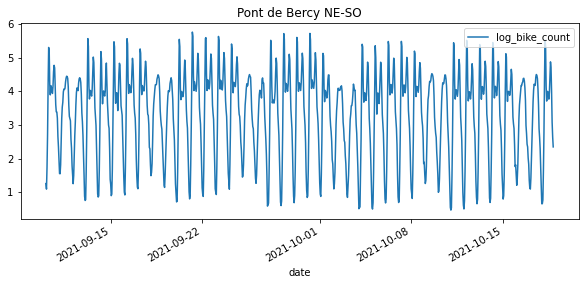

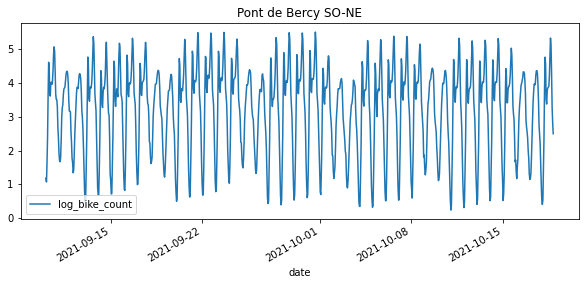

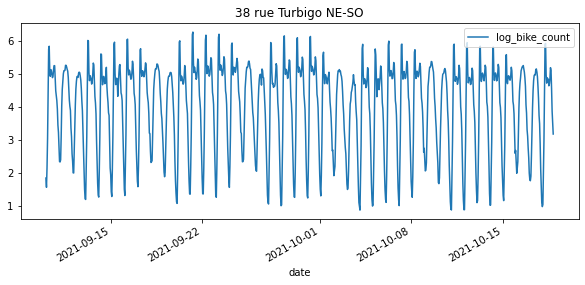

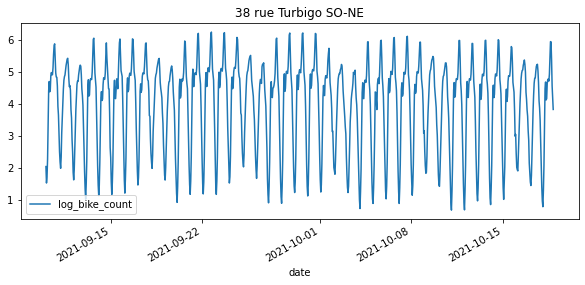

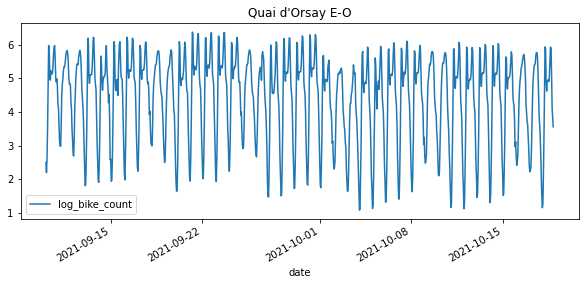

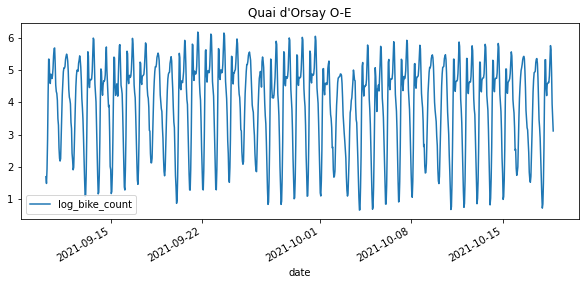

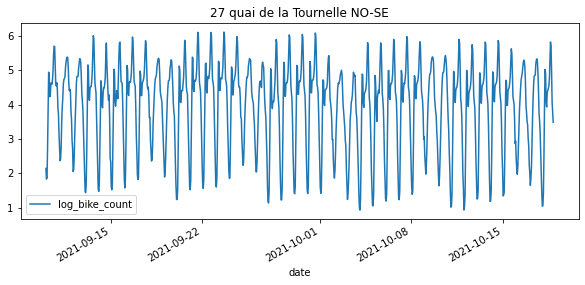

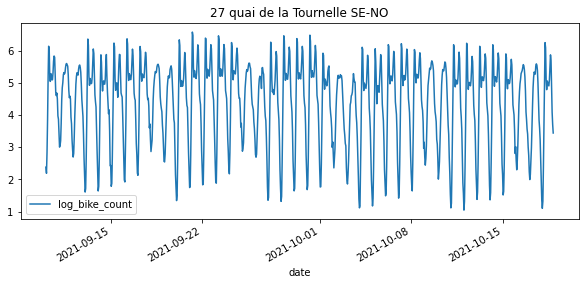

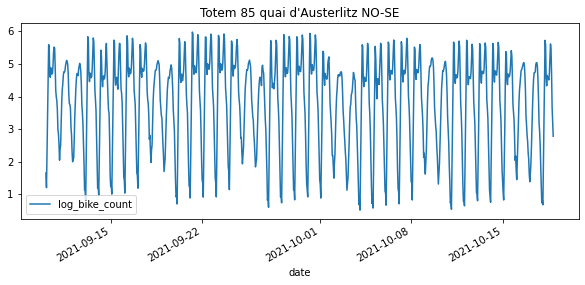

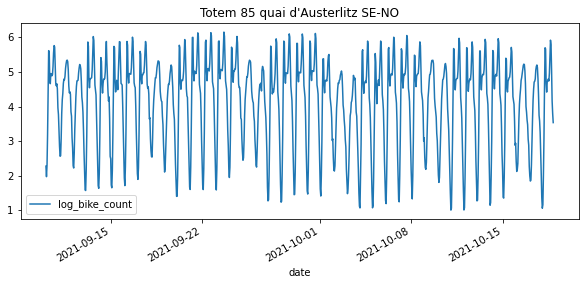

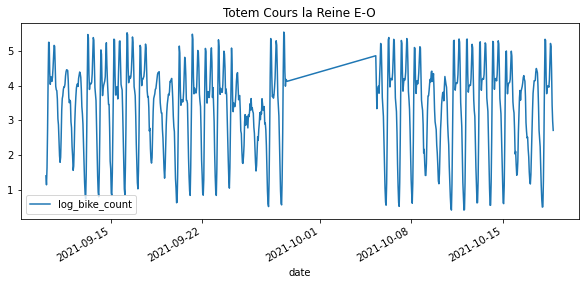

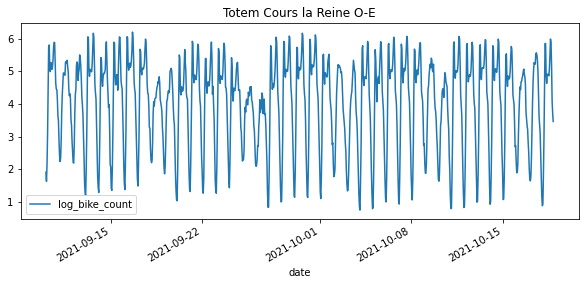

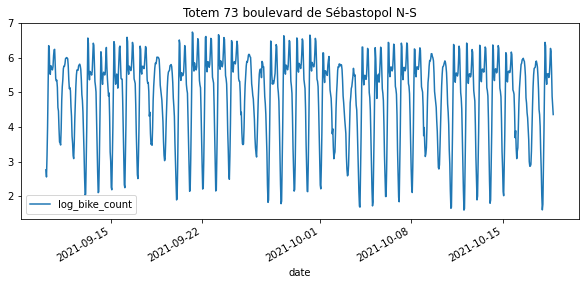

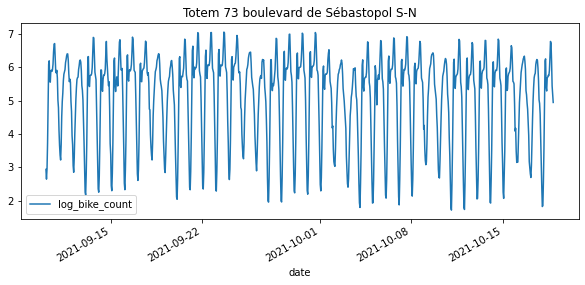

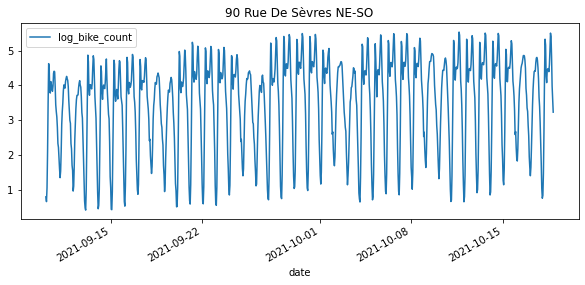

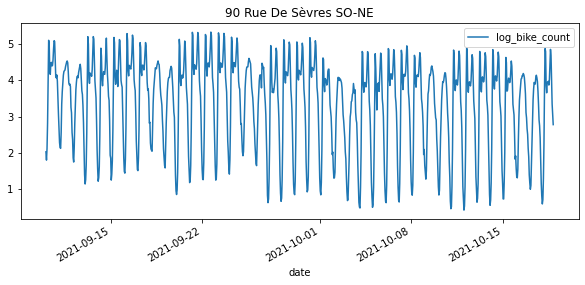

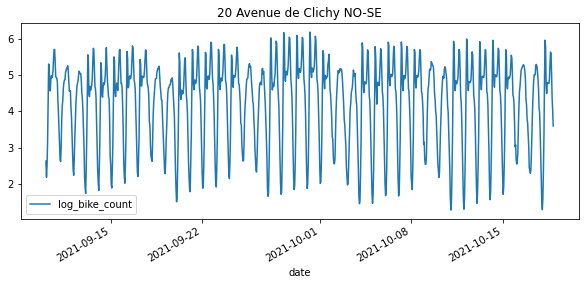

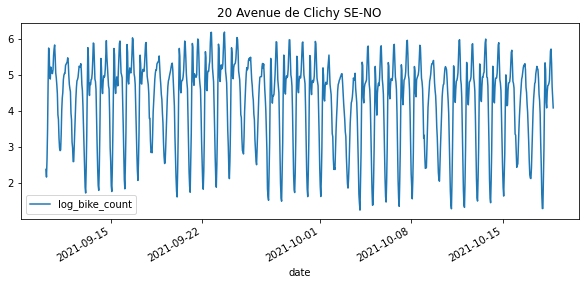

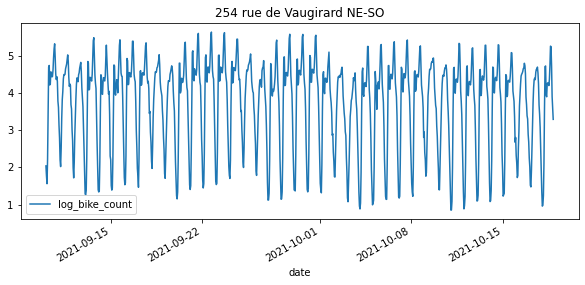

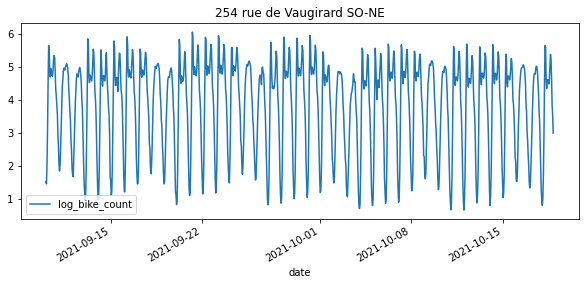

In [32]:
for counter in final_sub["counter_name"].unique():
    fig, ax = plt.subplots(figsize=(10, 4))

    mask = (
        (final_sub["counter_name"] == counter)
        & (final_sub["date"] > pd.to_datetime("2021/09/10"))
        & (final_sub["date"] < pd.to_datetime("2021/12/31"))
    )

    final_sub[mask].plot(x="date", y="log_bike_count", ax=ax)
    plt.title(f'{counter}')
    plt.show()